In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset
### Data generate

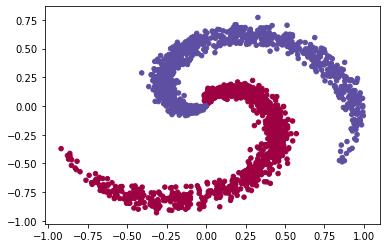

(2000, 2)
(2000, 1)


In [10]:
N = 1000 
D = 2
K = 2
inputs = np.zeros((N*K,D))
targets = np.zeros(N*K, dtype='uint8')
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N)
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2
    inputs[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    targets[ix] = j
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets, s=20, cmap=plt.cm.Spectral)
plt.show()

targets = targets[:, None]
print (inputs.shape)
print (targets.shape)

### Shuffling dataset

In [11]:
shuffle_indices = np.arange(len(inputs))
np.random.shuffle(shuffle_indices)

inputs = inputs[shuffle_indices]
targets = targets[shuffle_indices]

### Split the dataset

In [12]:
training_rate = .9

sample_count = len(inputs)
train_sample_count = int(training_rate * sample_count)

train_inputs  = inputs[0:train_sample_count]
train_targets = targets[0:train_sample_count]

test_inputs  = inputs[train_sample_count::]
test_targets = targets[train_sample_count::]

print(train_inputs.shape)
print(train_targets.shape)
print(test_inputs.shape)
print(test_targets.shape)

(1800, 2)
(1800, 1)
(200, 2)
(200, 1)


# Model

### Architecture :

In [13]:
inputs_units = 2
hidden_units = 10
outputs_units = 1

W1 = np.random.uniform(-1, 1, size=(inputs_units ,hidden_units))
W2 = np.random.uniform(-1, 1, size=(hidden_units ,outputs_units))

b1 = np.random.uniform(-1, 1, size=(1, hidden_units))
b2 = np.random.uniform(-1, 1, size=(1, outputs_units))

### Train Model :

In [14]:
X = train_inputs
y = train_targets

num_examples = train_inputs.shape[0]

learning_rate = 0.1
for epoch in range(10000):
    hidden_layer = np.maximum(0, np.dot(X, W1) + b1)

    output_layer = np.dot(hidden_layer, W2) + b2
    output_activation = 1 / (1 + np.exp(-output_layer))
    output_deactivation = output_activation * (1 - output_activation)
    y_hat = output_activation

    loss = -np.sum(y * np.log(y_hat) + (1 - y) * (np.log(1 - y_hat))) / num_examples
    
    d_loss = (y_hat - y) / num_examples
    d_loss *= output_deactivation
    
    dW2 = np.dot(hidden_layer.T, d_loss)
    db2 = np.sum(d_loss, axis=0, keepdims=True)

    dhidden = np.dot(d_loss, W2.T)
    dhidden[hidden_layer <= 0] = 0

    dW1 = np.dot(X.T, dhidden)
    db1 = np.sum(dhidden, axis=0, keepdims=True)
    
    
    W1 += -learning_rate * dW1
    b1 += -learning_rate * db1
    W2 += -learning_rate * dW2
    b2 += -learning_rate * db2
    
    y_h = y_hat.copy()
    y_h[y_h<=.5] = 0
    y_h[y_h>.5] = 1
    accuracy = (y == y_h).mean()
    
    if epoch % 500 ==0:
        print('Epoch {}, Loss: {:.4f}, Accuracy: {:.1f}%'.format(epoch, loss, 100*accuracy))

Epoch 0, Loss: 0.6740, Accuracy: 60.2%
Epoch 500, Loss: 0.4346, Accuracy: 74.3%
Epoch 1000, Loss: 0.4104, Accuracy: 72.4%
Epoch 1500, Loss: 0.3964, Accuracy: 72.9%
Epoch 2000, Loss: 0.3835, Accuracy: 74.6%
Epoch 2500, Loss: 0.3688, Accuracy: 77.0%
Epoch 3000, Loss: 0.3517, Accuracy: 79.3%
Epoch 3500, Loss: 0.3329, Accuracy: 82.0%
Epoch 4000, Loss: 0.3140, Accuracy: 85.9%
Epoch 4500, Loss: 0.2962, Accuracy: 88.3%
Epoch 5000, Loss: 0.2803, Accuracy: 89.7%
Epoch 5500, Loss: 0.2665, Accuracy: 90.8%
Epoch 6000, Loss: 0.2542, Accuracy: 91.3%
Epoch 6500, Loss: 0.2433, Accuracy: 92.1%
Epoch 7000, Loss: 0.2332, Accuracy: 92.5%
Epoch 7500, Loss: 0.2247, Accuracy: 92.7%
Epoch 8000, Loss: 0.2175, Accuracy: 92.7%
Epoch 8500, Loss: 0.2116, Accuracy: 92.8%
Epoch 9000, Loss: 0.2067, Accuracy: 92.9%
Epoch 9500, Loss: 0.2026, Accuracy: 92.8%


### Test Model :

In [15]:
X = test_inputs
y = test_targets

num_examples = len(y)

hidden_layer = np.maximum(0, np.dot(X, W1) + b1)

output_layer = np.dot(hidden_layer, W2) + b2
output_activation = 1 / (1 + np.exp(-output_layer))
output_deactivation = output_activation * (1 - output_activation)
y_hat = output_activation

loss = -np.sum(y * np.log(y_hat) + (1 - y) * (np.log(1 - y_hat))) / num_examples

y_hat[y_hat < .5] = 0
y_hat[y_hat >= .5] = 1

accuracy = (y == y_hat).mean()

print('Loss: {:.4f}, Accuracy: {:.1f}%'.format( loss, 100*accuracy))

Loss: 0.2199, Accuracy: 93.0%
